# Trump tweets
> ## Performing EDA 
> ## Machine Learning

In [1]:
# importig Lib
import spacy
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import missingno as mno
import warnings
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
trump_df = pd.read_csv('/Users/mohammadjuneidk/Downloads/Advance ML 1-2/Copy of trumptweets.csv')

In [3]:
trump_df

id                                               link  \
0               1698308935  https://twitter.com/realDonaldTrump/status/169...   
1               1701461182  https://twitter.com/realDonaldTrump/status/170...   
2               1737479987  https://twitter.com/realDonaldTrump/status/173...   
3               1741160716  https://twitter.com/realDonaldTrump/status/174...   
4               1773561338  https://twitter.com/realDonaldTrump/status/177...   
...                    ...                                                ...   
41117  1218962544372670467  https://twitter.com/realDonaldTrump/status/121...   
41118  1219004689716412416  https://twitter.com/realDonaldTrump/status/121...   
41119  1219053709428248576  https://twitter.com/realDonaldTrump/status/121...   
41120  1219066007731310593  https://twitter.com/realDonaldTrump/status/121...   
41121  1219076533354037249  https://twitter.com/realDonaldTrump/status/121...   

                                                 content                 date  \
0      Be sure to tune in and watch Donald Trump on L...  2009-05-04 20:54:25   
1      Donald Trump will be appearing on The View tom...  2009-05-05 03:00:10   
2      Donald Trump reads Top Ten Financial Tips on L...  2009-05-08 15:38:08   
3      New Blog Post: Celebrity Apprentice Finale and...  2009-05-08 22:40:15   
4      "My persona will never be that of a wallflower...  2009-05-12 16:07:28   
...                                                  ...                  ...   
41117  I have never seen the Republican Party as Stro...  2020-01-19 19:24:52   
41118  Now Mini Mike Bloomberg is critical of Jack Wi...  2020-01-19 22:12:20   
41119  I was thrilled to be back in the Great State o...  2020-01-20 01:27:07   
41120  “In the House, the President got less due proc...  2020-01-20 02:16:00   
41121  A great show! Check it out tonight at 9pm. @ F...  2020-01-20 02:57:49   

       retweets  favorites mentions hashtags  geo  
0           500        868      NaN      NaN  NaN  
1            33        273      NaN      NaN  NaN  
2            12         18      NaN      NaN  NaN  
3            11         24      NaN      NaN  NaN  
4          1399       1965      NaN      NaN  NaN  
...         ...        ...      ...      ...  ...  
41117     32620     213817      NaN      NaN  NaN  
41118     36239     149571      NaN      NaN  NaN  
41119     16588      66944      NaN        #  NaN  
41120     20599      81921    @ @ @      NaN  NaN  
41121      7947      34902        @      NaN  NaN  

[41122 rows x 9 columns]

In [4]:
# checking nan values
trump_df.isna().sum()

id               0
link             0
content          0
date             0
retweets         0
favorites        0
mentions     18655
hashtags     35312
geo          41122
dtype: int64

In [5]:
# here we are dropping some columns which are not neccesory for this analysis
trump_df.drop(columns=['mentions','hashtags','geo','link','id'],axis=1,inplace = True)
trump_df

content                 date  \
0      Be sure to tune in and watch Donald Trump on L...  2009-05-04 20:54:25   
1      Donald Trump will be appearing on The View tom...  2009-05-05 03:00:10   
2      Donald Trump reads Top Ten Financial Tips on L...  2009-05-08 15:38:08   
3      New Blog Post: Celebrity Apprentice Finale and...  2009-05-08 22:40:15   
4      "My persona will never be that of a wallflower...  2009-05-12 16:07:28   
...                                                  ...                  ...   
41117  I have never seen the Republican Party as Stro...  2020-01-19 19:24:52   
41118  Now Mini Mike Bloomberg is critical of Jack Wi...  2020-01-19 22:12:20   
41119  I was thrilled to be back in the Great State o...  2020-01-20 01:27:07   
41120  “In the House, the President got less due proc...  2020-01-20 02:16:00   
41121  A great show! Check it out tonight at 9pm. @ F...  2020-01-20 02:57:49   

       retweets  favorites  
0           500        868  
1            33        273  
2            12         18  
3            11         24  
4          1399       1965  
...         ...        ...  
41117     32620     213817  
41118     36239     149571  
41119     16588      66944  
41120     20599      81921  
41121      7947      34902  

[41122 rows x 4 columns]

In [6]:
df = trump_df.copy()

In [7]:
df.describe()

retweets      favorites
count   41122.000000   41122.000000
mean     5455.590657   22356.899105
std     10130.076661   41501.859711
min         0.000000       0.000000
25%        25.000000      28.000000
50%       291.000000     247.000000
75%      8778.000000   32970.750000
max    309892.000000  857678.000000

In [8]:
# converting the dtypes to datetime
df['date'] = pd.to_datetime(df["date"], format = '%Y-%m-%d %H:%M:%S')

In [9]:
# now lets findout the max retweets and what was the content of that tweet
max_retweets = [df.loc[df['retweets'].idxmax()]]

In [10]:
max_retweets

[content      # FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg
 date                                    2017-07-02 15:21:42
 retweets                                             309892
 favorites                                            528265
 Name: 32059, dtype: object]

In [11]:
# now lets findout the most favorites and what was the content of that tweet
most_fev = [df.loc[df['favorites'].idxmax()]]

In [12]:
most_fev

[content      A$AP Rocky released from prison and on his way...
 date                                       2019-08-02 19:41:30
 retweets                                                240363
 favorites                                               857678
 Name: 38625, dtype: object]

>> Find the percentage of tweets with **atleast one '!'**.

In [13]:
print_rows = df.loc[df['content'].str.contains("!", case=False)]
percentage = round(len(print_rows)/len(df)*100,2)
print(f'Percentage of tweets where atleat one "!" is used {percentage}%')

Percentage of tweets where atleat one "!" is used 49.13%


In [14]:
# checking data types
df.dtypes

content              object
date         datetime64[ns]
retweets              int64
favorites             int64
dtype: object

>> ### Removing weird spaces, stopwords and perform basic pre-processing - spelling correction, etc. 

In [15]:
# reomoving numbers from tweets
df['new_tweets'] = df['content'].str.replace('\d+', '')

>> #### removing
* URLs
* Hashtags
* Mentions
* Reserved words (RT, FAV)
* Emojis
* Smileys

In [16]:
# Preprocessing using Regex
pattern = r'(@\s\w+)|(@\w+)|http?://|https?://[^\s<>"]+|(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'


In [17]:
df['new_tweets'] = df['new_tweets'].str.replace(pattern, " ",case=False)

In [18]:
# initialize Spacy ‘en’ model, keeping only the component need for lemmatization and creating an engine:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [19]:
df['new_tweets'] = df['new_tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['new_tweets'].head()

0    be sure to tune in and watch donald trump on l...
1    donald trump will be appearing on the view tom...
2    donald trump reads top ten financial tips on l...
3    new blog post: celebrity apprentice finale and...
4    "my persona will never be that of a wallflower...
Name: new_tweets, dtype: object

In [20]:
#Next, we will remove punctuation:
df['new_tweets'] = df['new_tweets'].str.replace('[^\w\s]','')
df['new_tweets'].head()

0    be sure to tune in and watch donald trump on l...
1    donald trump will be appearing on the view tom...
2    donald trump reads top ten financial tips on l...
3    new blog post celebrity apprentice finale and ...
4    my persona will never be that of a wallflower ...
Name: new_tweets, dtype: object

In [21]:
import preprocessor as p
def preprocess_tweet(row):
    text = row['new_tweets']
    text = p.clean(text)
    return text

df['new_tweets'] = df.apply(preprocess_tweet, axis=1)

In [22]:
# further inspection of the reviews, I noticed there were emoji’s used so I will remove those 
# using a function provided by Kamil Slowikowski and apply it to new_reviews.
# REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['new_tweets'] = df['new_tweets'].apply(lambda x: remove_emoji(x))

In [23]:
df.sample(10)

content                date  \
18154  Next Tuesday, remember how our president has n... 2014-10-31 19:18:06   
14154                            Just terrible! # Oscars 2014-03-03 03:40:33   
27368  The Ted Cruz wiseguy apology to the people of ... 2016-01-16 13:12:45   
28831  I will defeat Crooked Hillary Clinton on 11/8/... 2016-05-02 18:16:14   
26105  They are saying that tickets to tonight's Satu... 2015-11-07 18:47:55   
22215  Why are the Republicans giving Obama fast trac... 2015-04-23 19:55:39   
36663  ....The Dems and their committees are going “n... 2019-02-07 12:26:48   
39355  Just leaving the Great State of Ohio for New Y... 2019-09-23 02:06:54   
38287  Paul Ryan, the failed V.P. candidate & former ... 2019-07-12 05:10:41   
25007  Jeb has been confused for forty years- https:/... 2015-09-21 17:26:53   

       retweets  favorites                                         new_tweets  
18154       318        289  next tuesday remember how our president has no...  
14154      4120       3736                               just terrible oscars  
27368      1951       4936  the ted cruz wiseguy apology to the people of ...  
28831      9505      24317     i will defeat crooked hillary clinton on trump  
26105      1195       2827  they are saying that tickets to tonights satur...  
22215       355        379  why are the republicans giving obama fast trac...  
36663     23939     108716  the dems and their committees are going nuts t...  
39355     15445      87458  just leaving the great state of ohio for new y...  
38287     10870      50018  paul ryan the failed vp candidate former speak...  
25007       735       1642              jeb has been confused for forty years

In [24]:
# removing stopewords
stop = stopwords.words('english')
df['new_tweets'] = df['new_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [25]:
df.sample(10)

content                date  \
26305  One of the saddest things in journalism is wha... 2015-11-17 21:48:34   
19650  " @ MikeDemkiw: @ realDonaldTrump Kevin Jonas ... 2015-01-05 04:23:18   
14408  " @ TpGraf82 @ realDonaldTrump you tweet a lot... 2014-03-24 17:13:19   
25927  " @ dalva1616: So true! Vote @ realDonaldTrump... 2015-10-31 12:20:11   
11573  "@J_Lowry_: Idc what anyone says @ realDonaldT... 2013-09-05 06:29:00   
10490  "Sometimes people spend too much time focusing... 2013-07-17 22:44:02   
16124  Congrats to @ leezeldin on a great victory. I ... 2014-06-25 21:33:36   
2086     I'll be on @ foxandfriends on Monday at 7:30 AM 2012-05-18 21:59:30   
38754  Good things were stated on the call with China... 2019-08-15 00:32:56   
20433  " @ SportingBecky: @ realDonaldTrump @ DonaldJ... 2015-01-27 01:46:03   

       retweets  favorites                                         new_tweets  
26305      1288       3291  one saddest things journalism happened formerl...  
19650        20         35                kevin jonas strong player surprised  
14408        22         43  tweet lot great motivating things im waiting t...  
25927       559       1238  true vote america greatness back belongs unite...  
11573        10         12                           idc anyone says man nice  
10490       741        285  sometimes people spend much time focusing prob...  
16124        31         28    congrats great victory hope robocalls helped ny  
2086         12          8                                         ill monday  
38754     16084      85464  good things stated call china day eating tarif...  
20433        16         27                        celebrityapprentice tonight

> Lastly, we will implement lemmatization using Spacy so that we can count the appearance of each word. Lemmatization removes the grammar tense and transforms each word into its original form. Another way of converting words to its original form is called stemming. While stemming takes the linguistic root of a word, lemmatization is taking a word into its original lemma. For example, if we performed stemming on the word “apples”, the result would be “appl”, whereas lemmatization would give us “apple”. Therefore I prefer lemmatization over stemming, as its much easier to interpret.

In [26]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['new_tweets']= df['new_tweets'].apply(space)

> To review, the steps used to complete preprocessing our data were:
* Remove Numbers
* Make text lowercase
* Remove punctuation
* Remove emoji’s
* Remove stopwords
* Lemmatization

##### now lets looks at our final dataset

In [27]:
df.sample(10)

content                date  \
6699                @ JamesRobert_ Hi Robert--good luck. 2013-02-21 17:10:43   
20027  " @ hidej491: @ realdonaldtrump WIth us you ar... 2015-01-10 10:53:56   
5823                        @ CreativeGuy4U Thanks John. 2013-01-22 20:24:56   
35431  I want to know, where is the money for Border ... 2018-09-20 13:43:01   
34564  Hiring manythousands of judges, and going thro... 2018-06-25 14:43:00   
27303  Union Leader refuses to comment as to why they... 2016-01-11 00:23:07   
5154   @ candicebazuin @ BravoAndy @ GiulianaRancic T... 2012-12-20 22:23:57   
8104   . @ Yankees Kevin Youkilis is off to a terrifi... 2013-04-10 22:46:24   
11590  "@gregfrech: @ realDonaldTrump have you seen t... 2013-09-05 14:45:00   
39471  ....rid of Donald J. Trump - And the Democrats... 2019-09-30 03:11:54   

       retweets  favorites                                         new_tweets  
6699          4          1                                 hi robertgood luck  
20027         8         16                                                 we  
5823          0          2                                         thank john  
35431     26706     106452  want know money border security wall ridiculou...  
34564     19275      84524  hire manythousand judge go long complicated le...  
27303      1239       4060  union leader refuse comment kick abc news deba...  
5154          3          0                                           terrific  
8104        308        129  kevin youkilis terrific start he s less half p...  
11590        56         32  see video rebel commander cut eat syrian soldi...  
39471      8279      30635  rid donald j trump democrats do not care burn ...

In [28]:
# now we have the cleaned tweets so lets drop the content column
df.drop('content',inplace=True,axis=1)
df

date  retweets  favorites  \
0     2009-05-04 20:54:25       500        868   
1     2009-05-05 03:00:10        33        273   
2     2009-05-08 15:38:08        12         18   
3     2009-05-08 22:40:15        11         24   
4     2009-05-12 16:07:28      1399       1965   
...                   ...       ...        ...   
41117 2020-01-19 19:24:52     32620     213817   
41118 2020-01-19 22:12:20     36239     149571   
41119 2020-01-20 01:27:07     16588      66944   
41120 2020-01-20 02:16:00     20599      81921   
41121 2020-01-20 02:57:49      7947      34902   

                                              new_tweets  
0      sure tune watch donald trump late night david ...  
1      donald trump appear view tomorrow morning disc...  
2      donald trump read top ten financial tip late s...  
3      new blog post celebrity apprentice finale less...  
4      persona never wallflower I d rather build wall...  
...                                                  ...  
41117  never see republican party strong unify right ...  
41118  mini mike bloomberg critical jack wilson save ...  
41119  thrill back great state texas tonight people k...  
41120  house president get less due process terrorist...  
41121                        great show check tonight pm  

[41122 rows x 4 columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        41122 non-null  datetime64[ns]
 1   retweets    41122 non-null  int64         
 2   favorites   41122 non-null  int64         
 3   new_tweets  41122 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.3+ MB


>> #### let's find-out most common words used in tweets and visualize

In [30]:
# using collections lib we can get the most used words
from collections import Counter
s  = Counter(' '.join(df['new_tweets']).split()).most_common()

most_ct = pd.DataFrame(s,columns=['Tweets','count'])  # storing it in a dataframe 
most_ct

Tweets  count
0               great   6446
1               trump   6019
2               thank   4833
3                 not   4366
4                 get   3142
...               ...    ...
21456  americadeserve      1
21457          flawed      1
21458         paydirt      1
21459         rampage      1
21460        fiercely      1

[21461 rows x 2 columns]

In [31]:
# filtering out the wrods whose count is > than the threshold
threshold = 1000
most_ct = most_ct[most_ct['count'] > threshold]

In [32]:
most_ct.sample(5)

Tweets  count
17     say   1757
10  people   2486
28    year   1505
44       s   1154
9     good   2507

In [33]:
fig = px.bar(most_ct, x='Tweets', y='count',
             barmode='group',text_auto=True,orientation='v',
             height=500,color= 'count')

    

fig.update_layout(title="most common words used in tweets",
                  autosize=False,
                  width=1200,
                  height=800,
                  template = "plotly_white",
                  uniformtext_mode='hide',
    )
                

fig.update_xaxes(showgrid= True)
fig.update_yaxes(showgrid= True)  
fig.update_layout(hovermode="x unified")

fig.show()

In [34]:
# sorting the most_ct to plot animated plots 
most_ct.sort_values(by=['count'], ascending=True,inplace=True)

In [35]:
# reseting the index 
most_ct.reset_index(drop=True,inplace=True)

In [36]:
# plotting animated bar chart 
fig = px.bar(most_ct, x='Tweets', y='count',
             barmode='group', text_auto=True, orientation='v',
              animation_frame='count', animation_group="Tweets", range_y=[0, 7000])


fig.update_layout(title="most common words used in tweets",
                  autosize=False,
                  width=700,
                  height=700,
                  template="presentation",
                  uniformtext_mode='hide',
                  title_font_color="red",
                  font=dict(
                        family="Arial",
                        size=15,
                        color="green")

                  )
fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(
        #tickangle = 90,
        title_text = "words",
        title_font = {"size": 10},
        title_standoff = 25)
fig.update_yaxes(
        #tickangle = 90,
        title_text = "count",
        title_font = {"size": 10},
        title_standoff = 15)

# to reduce or increase the duration
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2001
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 2


fig.show()


> #### Using sentiment.polarity_score function, let's Find the polarity score of all the tweets and categorize them as Positive, Negative or Neutral.

In [37]:
from textblob import TextBlob 
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [38]:
df['Polarity'] = df['new_tweets'].apply(get_polarity)

In [39]:
df['Sentiment_Type'] = ''
df.loc[df.Polarity > 0, 'Sentiment_Type'] = 'POSITIVE'
df.loc[df.Polarity == 0, 'Sentiment_Type'] = 'NEUTRAL'
df.loc[df.Polarity < 0, 'Sentiment_Type'] = 'NEGATIVE'


In [40]:
df.sample(5)

date  retweets  favorites  \
37519 2019-05-10 13:43:56      5925      24226   
37985 2019-06-16 06:51:05     16732      78778   
5240  2012-12-28 19:28:35        28         15   
40872 2019-12-26 00:04:50     25969      89620   
21092 2015-02-25 01:47:50      1936       1220   

                                              new_tweets  Polarity  \
37519  agricultural product great farmer large amount...  0.204762   
37985  state want governor leader do not courage poli... -0.500000   
5240   spolier alertthe record set th season star als... -0.166667   
40872                                     wow giant scam  0.050000   
21092  mexican legal system corrupt much mexico pay m... -0.100000   

      Sentiment_Type  
37519       POSITIVE  
37985       NEGATIVE  
5240        NEGATIVE  
40872       POSITIVE  
21092       NEGATIVE

let's creat a wordcloud and plot

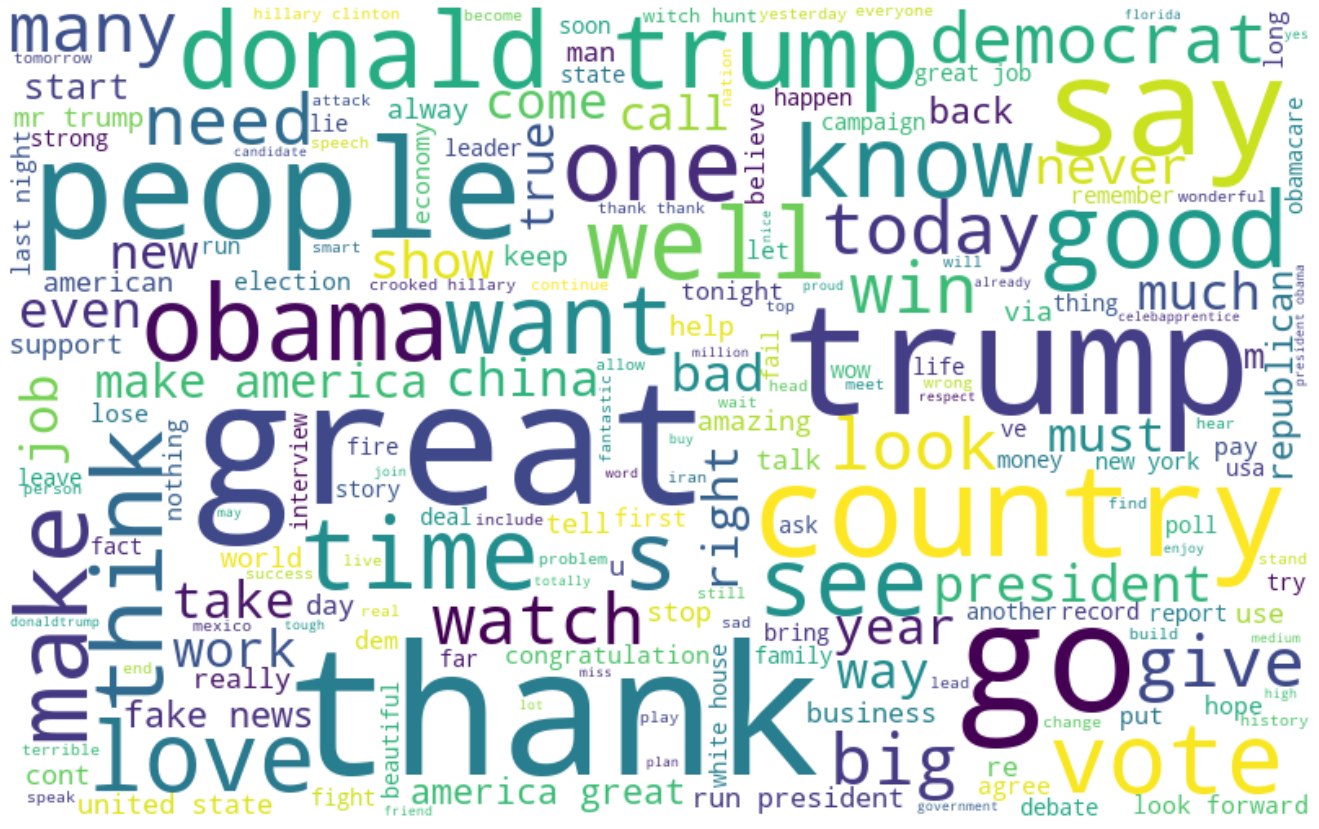

In [41]:
all_words = ' '.join([text for text in (df['new_tweets'])])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color = 'white').generate(all_words)
plt.figure(figsize=(25, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

>> ### filtering out the tweets on basis of sentiments and storing in a vaiable so we do further operation 

In [42]:

positive = df[df['Sentiment_Type'] == 'POSITIVE']
n = df[df['Sentiment_Type'] == 'NEUTRAL']
negative = df[df['Sentiment_Type'] == 'NEGATIVE']


positive.reset_index(drop=True, inplace=True)
n.reset_index(drop=True, inplace=True)
negative.reset_index(drop=True, inplace=True)


* #### calculating the percentage of positive, neutral and negative tweets and printing them 

In [43]:

print(f'Total Positive Tweets Percentage {round(len(positive)/len(trump_df)*100,2)}')
print(f'Total Neutral Tweets Percentage {round(len(n)/len(trump_df)*100,2)}')
print(f'Total Negative Tweets Percentage {round(len(negative)/len(trump_df)*100,2)}')

Total Positive Tweets Percentage 51.11
Total Neutral Tweets Percentage 30.57
Total Negative Tweets Percentage 18.31


* ### Visualizing it with a pie chart

In [44]:
fig = px.pie(df, values=df.index, names='Sentiment_Type', color='Sentiment_Type', color_discrete_map={
    'POSITIVE': 'yellowgreen',
    'NEUTRAL': 'lightblue',
    'NEGATIVE': 'red'})
fig.update_traces(textposition='inside', textfont_size=15)
fig.update_layout(autosize=False, title='Sentiment of total tweets',
                  width=1200,
                  height=500,
                  template="presentation",
                  uniformtext_mode='hide',
                  )

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)


fig.show()


> ### Donut Chart

In [45]:
colors = ['mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=df['Sentiment_Type'], values=df.index, hole=.3, textinfo='label+percent',
                             insidetextorientation='radial')])
fig.update_traces(textposition='inside', textfont_size=15)
fig.update_layout(autosize=False, title='Sentiment of total tweets',
                  width=500,
                  height=500,
                  template="plotly_dark",
                  uniformtext_mode='hide',
                  )

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


> Visualizing the tweets sentimet
 * most common words used in positive tweets
 * most common words used in neutral tweets
 * most common words used in negative tweets

In [46]:
most_common_pos_word  = Counter(' '.join(positive['new_tweets']).split()).most_common()
most_common_pos_word = pd.DataFrame(most_common_pos_word,columns=['Tweets','count'])
most_common_pos_word = most_common_pos_word[most_common_pos_word['count'] > 1000]         # as there are soo many words so we are only plotting which used more than 1000

most_common_n_word  = Counter(' '.join(n['new_tweets']).split()).most_common()
most_common_n_word = pd.DataFrame(most_common_n_word,columns=['Tweets','count'])
most_common_n_word = most_common_n_word[most_common_n_word['count'] > 500]                  # as there are soo many words so we are only plotting which used more than 500

most_common_neg_word  = Counter(' '.join(negative['new_tweets']).split()).most_common()
most_common_neg_word = pd.DataFrame(most_common_neg_word,columns=['Tweets','count'])
most_common_neg_word = most_common_neg_word[most_common_neg_word['count'] > 500]            # as there are soo many words so we are only plotting which used more than 500

In [47]:
fig = px.bar(most_common_pos_word, x='Tweets', y='count',
             barmode='group', text_auto=True, orientation='v',
             height=500, pattern_shape_sequence=["x"])

# Customize aspect
fig.update_traces(marker_color='green', marker_line_color='green',
                  marker_line_width=1.5, opacity=1,)
fig.update_traces(
    marker=dict(line_color="teal"))  # pattern_fillmode="replace"

fig.update_layout(uniformtext_minsize=15, )  # uniformtext_mode='hide'

fig.update_layout(title="most common words used in Positive tweets",
                  autosize=False,
                  width=1500,
                  height=500,
                  template="plotly_white",
                  uniformtext_mode='hide',
                  )


fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(hovermode="x unified")

fig.show()


In [48]:
fig = px.bar(most_common_n_word, x='Tweets', y='count',
             barmode='group', text_auto=True, orientation='v',
             height=500, pattern_shape_sequence=["\\"])


# Customize aspect
fig.update_traces(marker_color='blue', marker_line_color='white',
                  marker_line_width=2, opacity=1)
fig.update_traces(
    marker=dict(line_color="yellow"))  # pattern_fillmode="replace"

fig.update_layout(title="most common words used in neutral tweets",
                  autosize=False,
                  width=1200,
                  height=500,
                  template="plotly_dark",
                  uniformtext_mode='hide',
                  )


fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(hovermode="x unified")

fig.show()


In [49]:
fig = px.bar(most_common_neg_word, x='Tweets', y='count',
             barmode='group', text_auto=True, orientation='v',
             height=500, pattern_shape_sequence=["."])


# Customize aspect
fig.update_traces(marker_color='red', marker_line_color='red',
                  marker_line_width=1.5, opacity=1,)
fig.update_traces(
    marker=dict(line_color="yellow"))  # pattern_fillmode="replace"

fig.update_layout(title="most common words used in negative tweets",
                  autosize=False,
                  width=1200,
                  height=500,
                  template="plotly_white",
                  uniformtext_mode='hide',
                  )


fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(hovermode="x unified")

fig.show()


> #### Based on the polarity scores of every tweet, plotting the mean positivity / negativity scores with respect to year.

In [50]:
year_base_pos = df[df['Sentiment_Type'] == 'POSITIVE']
year_base_pos = year_base_pos.groupby(df['date'].dt.year)['Polarity'].agg(['sum', 'mean', 'max'])
year_base_pos = year_base_pos.round(2)

year_base_neg = df[df['Sentiment_Type'] == 'NEGATIVE']
year_base_neg = year_base_neg.groupby(df['date'].dt.year)['Polarity'].agg(['sum', 'mean', 'max'])
year_base_neg = year_base_neg.round(2)

In [51]:
fig = px.bar(year_base_pos, x=year_base_pos.index, y='mean',
             barmode='group', text_auto=True, orientation='v')

fig.update_layout(title="mean polarity score of common words used in positive tweets",
                  autosize=True,

                  template="presentation",
                  uniformtext_mode='hide',
                  )
fig.update_traces(marker_color='green', marker_line_color='green',
                  marker_line_width=1.5, opacity=.5,)
fig.update_xaxes(type='category')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(hovermode="x unified")

fig.show()

fig = px.bar(year_base_neg, x=year_base_neg.index, y='mean',
             barmode='group', text_auto=True, orientation='v',)
# Customize aspect
fig.update_traces(marker_color='red', marker_line_color='red',
                  marker_line_width=1.5, opacity=.5,)


fig.update_layout(title="mean polarity score of common words used in negative tweets",
                  autosize=True,
                  template="presentation",
                  uniformtext_mode='hide',
                  )

fig.update_xaxes(type='category')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(hovermode="x unified")

fig.show()


In [52]:
# adding score column based on the sentiment type
for i in df.index:
    if df.loc[i, 'Sentiment_Type'] == 'POSITIVE':
        df.loc[i,'Score'] = 1
    elif df.loc[i, 'Sentiment_Type'] == 'NEUTRAL':
         df.loc[i,'Score'] = 0
    elif df.loc[i, 'Sentiment_Type'] == 'NEGATIVE':
         df.loc[i,'Score'] = -1
df.head()

date  retweets  favorites  \
0 2009-05-04 20:54:25       500        868   
1 2009-05-05 03:00:10        33        273   
2 2009-05-08 15:38:08        12         18   
3 2009-05-08 22:40:15        11         24   
4 2009-05-12 16:07:28      1399       1965   

                                          new_tweets  Polarity Sentiment_Type  \
0  sure tune watch donald trump late night david ...  0.140000       POSITIVE   
1  donald trump appear view tomorrow morning disc...  0.136364       POSITIVE   
2  donald trump read top ten financial tip late s...  0.090000       POSITIVE   
3  new blog post celebrity apprentice finale less...  0.136364       POSITIVE   
4  persona never wallflower I d rather build wall...  0.000000        NEUTRAL   

   Score  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    0.0

In [53]:
# let's drop the unrequired columns for model training
df.drop(columns=['date','retweets','favorites','Polarity','Sentiment_Type'],axis = 1, inplace = True)
df

new_tweets  Score
0      sure tune watch donald trump late night david ...    1.0
1      donald trump appear view tomorrow morning disc...    1.0
2      donald trump read top ten financial tip late s...    1.0
3      new blog post celebrity apprentice finale less...    1.0
4      persona never wallflower I d rather build wall...    0.0
...                                                  ...    ...
41117  never see republican party strong unify right ...    1.0
41118  mini mike bloomberg critical jack wilson save ...   -1.0
41119  thrill back great state texas tonight people k...    1.0
41120  house president get less due process terrorist...   -1.0
41121                        great show check tonight pm    1.0

[41122 rows x 2 columns]

In [54]:
# by using sklearn module we will perform count vectorizer and storeit in a new dataframe
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
df1 = pd.DataFrame(cv.fit_transform(df.new_tweets).toarray(),columns=cv.get_feature_names())

In [55]:
df1.sample(5)

aa  aaa  aand  aap  aaron  ab  abandon  abbas  abbott  abbottabad  ...  \
23912   0    0     0    0      0   0        0      0       0           0  ...   
18665   0    0     0    0      0   0        0      0       0           0  ...   
10536   0    0     0    0      0   0        0      0       0           0  ...   
14158   0    0     0    0      0   0        0      0       0           0  ...   
37899   0    0     0    0      0   0        0      0       0           0  ...   

       zoom  zte  zucker  zuckerberg  zuckerbergget  zuckerbergs  zuckerman  \
23912     0    0       0           0              0            0          0   
18665     0    0       0           0              0            0          0   
10536     0    0       0           0              0            0          0   
14158     0    0       0           0              0            0          0   
37899     0    0       0           0              0            0          0   

       zuckers  zuker  zukerisaloser  
23912        0      0              0  
18665        0      0              0  
10536        0      0              0  
14158        0      0              0  
37899        0      0              0  

[5 rows x 21437 columns]

In [56]:
df1 = pd.concat([df1,df['Score']],axis=1) # merging the socre column into df1
df1.sample(5)

aa  aaa  aand  aap  aaron  ab  abandon  abbas  abbott  abbottabad  ...  \
36600   0    0     0    0      0   0        0      0       0           0  ...   
11265   0    0     0    0      0   0        0      0       0           0  ...   
10767   0    0     0    0      0   0        0      0       0           0  ...   
35238   0    0     0    0      0   0        0      0       0           0  ...   
9741    0    0     0    0      0   0        0      0       0           0  ...   

       zte  zucker  zuckerberg  zuckerbergget  zuckerbergs  zuckerman  \
36600    0       0           0              0            0          0   
11265    0       0           0              0            0          0   
10767    0       0           0              0            0          0   
35238    0       0           0              0            0          0   
9741     0       0           0              0            0          0   

       zuckers  zuker  zukerisaloser  Score  
36600        0      0              0    0.0  
11265        0      0              0    0.0  
10767        0      0              0   -1.0  
35238        0      0              0    1.0  
9741         0      0              0   -1.0  

[5 rows x 21438 columns]

In [57]:
# as the above data is larger so it will take much time to train and test all the models so im just taking a subset of the data
df1 = df1.iloc[:, list(range(100)) + [-1]] # taking the first 100 columns and the last column polarity and joining them
df1 = df1.iloc[:20000]   # selecting only subset of the data

In [58]:
# splitting the data into features and target
X = df1.drop(columns=['Score'], axis=1)
y = df1['Score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

> ### model building

> getting the knn values

In [59]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))


for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

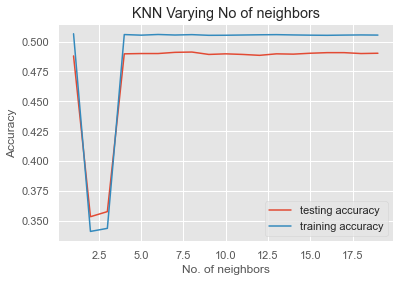

In [60]:
# Importing matplotlib library
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Generating the plot between Accuracy and No. o neighbors
plt.title('KNN Varying No of neighbors')
plt.plot(neighbors,test_accuracy,label='testing accuracy')
plt.plot(neighbors,train_accuracy,label='training accuracy')
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### let's plot it in plotly

In [74]:
# plotting the data
fig = go.Figure()
fig.add_trace(
    go.Scatter(x = neighbors, y = test_accuracy,
                line = dict(color = 'yellowgreen', width = 2.5),
                mode = "lines+markers",name = 'test_accuracy'
                 ))

fig.add_trace(
    go.Scatter(x = neighbors, y = train_accuracy,
                line = dict(color = 'orange', width = 2.5),
                mode = "lines",name = 'train_accuracy',
                 ))

# updating the figure as per our requirements
fig.update_layout(title='KNN Varying No of neighbors',
                xaxis_title='No. of neighbors',
                yaxis_title='Accuracy',
                autosize=True,
                #width=1500,
                #height=600,
                template = "plotly_dark")

fig.update_xaxes(type='category')
fig.update_layout(hovermode="x")
fig.show()

In [75]:
#Perform feature scaling by normalizing the train and test features #
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [76]:
# lets import some more algorithms and test 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
# creating a list of models and assinging it to the model variable 
models = [DecisionTreeClassifier(),SVC(kernel='linear'),KNeighborsClassifier(n_neighbors = 5),RandomForestClassifier()]

In [78]:
# creating function to compare the models accuracy
def compare_models():
    for model in models:
        model.fit(X_train,y_train)
        test_data_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,test_data_pred)
        print('accuracy score of the model',model, '=', accuracy)

In [79]:
compare_models()

accuracy score of the model DecisionTreeClassifier() = 0.4895
accuracy score of the model SVC(kernel='linear') = 0.4905
accuracy score of the model KNeighborsClassifier() = 0.4905
accuracy score of the model RandomForestClassifier() = 0.48975


In [80]:
#importing KNN
from sklearn.neighbors import KNeighborsClassifier # Instantiating the model
clf = KNeighborsClassifier(n_neighbors=5) # Training the model
clf.fit(X_train, y_train)
# Predicting the outputs #
y_pred_knn = clf.predict(X_test)

In [81]:
# Importing the decision tree classifier #
from sklearn.tree import DecisionTreeClassifier # Instantiating the classifier #
classifier = DecisionTreeClassifier() # Training the model #
classifier = classifier.fit(X_train,y_train)
# Predicting the outputs #
y_pred_tree = classifier.predict(X_test)

In [82]:
sv = SVC(kernel='linear')
sv = sv.fit(X_train,y_train)
# Predicting the outputs #
y_pred_svc = sv.predict(X_test)

In [83]:
rd = RandomForestClassifier()
rd = rd.fit(X_train,y_train)
# Predicting the outputs #
y_pred_rd = rd.predict(X_test)


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

        -1.0       0.33      0.01      0.01       647
         0.0       0.62      0.00      0.01      1391
         1.0       0.49      1.00      0.66      1962

    accuracy                           0.49      4000
   macro avg       0.48      0.34      0.23      4000
weighted avg       0.51      0.49      0.33      4000



> storing all the scores in a dataframe

In [85]:
# Importing the different metrices to measure the effectiveness of the model #
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
# Evaluation metrics for the KNN model #
knn_acc = accuracy_score(y_pred_knn,y_test) 
knn_prec = precision_score(y_pred_knn,y_test,average='weighted') 
knn_recall = recall_score(y_pred_knn,y_test,average='weighted') 
knn_f1 = f1_score(y_pred_knn,y_test,average='weighted')
# Evaluation metrics for the Decision Tree model #
tree_acc = accuracy_score(y_pred_tree,y_test) 
tree_prec = precision_score(y_pred_tree,y_test,average='weighted') 
tree_recall = recall_score(y_pred_tree,y_test,average='weighted') 
tree_f1 = f1_score(y_pred_tree,y_test,average='weighted')


svm_acc = accuracy_score(y_pred_svc,y_test) 
svm_prec = precision_score(y_pred_svc,y_test,average='weighted') 
svm_recall = recall_score(y_pred_svc,y_test,average='weighted') 
svm_f1 = f1_score(y_pred_svc,y_test,average='weighted')


rd_acc = accuracy_score(y_pred_rd,y_test,) 
rd_prec = precision_score(y_pred_rd,y_test,average='weighted') 
rd_recall = recall_score(y_pred_rd,y_test,average='weighted') 
rd_f1 = f1_score(y_pred_rd,y_test,average='weighted')


indices = ['Accuracy','Precision','Recall','F1_Score'] 
scores_dict = {'KNN':[knn_acc,knn_prec,knn_recall,knn_f1],
'Decsion Tree':[tree_acc,tree_prec,tree_recall,tree_f1],'RandomForestClassifier':[svm_acc,svm_prec,svm_recall,svm_f1],'SVM':[rd_acc,rd_prec,rd_recall,rd_f1]} 
metrics = pd.DataFrame(scores_dict,index=indices).round(decimals=2)
metrics

KNN  Decsion Tree  RandomForestClassifier   SVM
Accuracy   0.49          0.49                    0.49  0.49
Precision  0.99          0.99                    1.00  0.99
Recall     0.49          0.49                    0.49  0.49
F1_Score   0.65          0.65                    0.66  0.65

In [86]:
fig = go.Figure(data=[
    go.Bar(name='KNN', x=metrics.index, y=metrics['KNN']),
    go.Bar(name='Decsion Tree', x=metrics.index, y=metrics['Decsion Tree']),
    go.Bar(name='RandomForestClassifier', x=metrics.index, y=metrics['RandomForestClassifier']),
    go.Bar(name='SVM', x=metrics.index, y=metrics['SVM'],textposition='inside'),])
# Change the bar mode
fig.update_layout(barmode='group')

fig.update_layout(title="metrics comparison",
                  autosize=True,

                  template = "presentation",
                  uniformtext_mode='hide',
    )
                
fig.update_xaxes(type='category')

#fig.update_layout(hovermode="x unified")

fig.show()

In [87]:
# Importing confusion matrix #
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 

#storing all the models CM in varibales 
cm_knn = confusion_matrix(y_pred_knn,y_test) 
cm_tree = confusion_matrix(y_pred_tree,y_test)
cm_svc = confusion_matrix(y_pred_svc,y_test)
cm_rd = confusion_matrix(y_pred_rd,y_test)

> ##### Visualizing the confusion matrices of both the models for comparison 

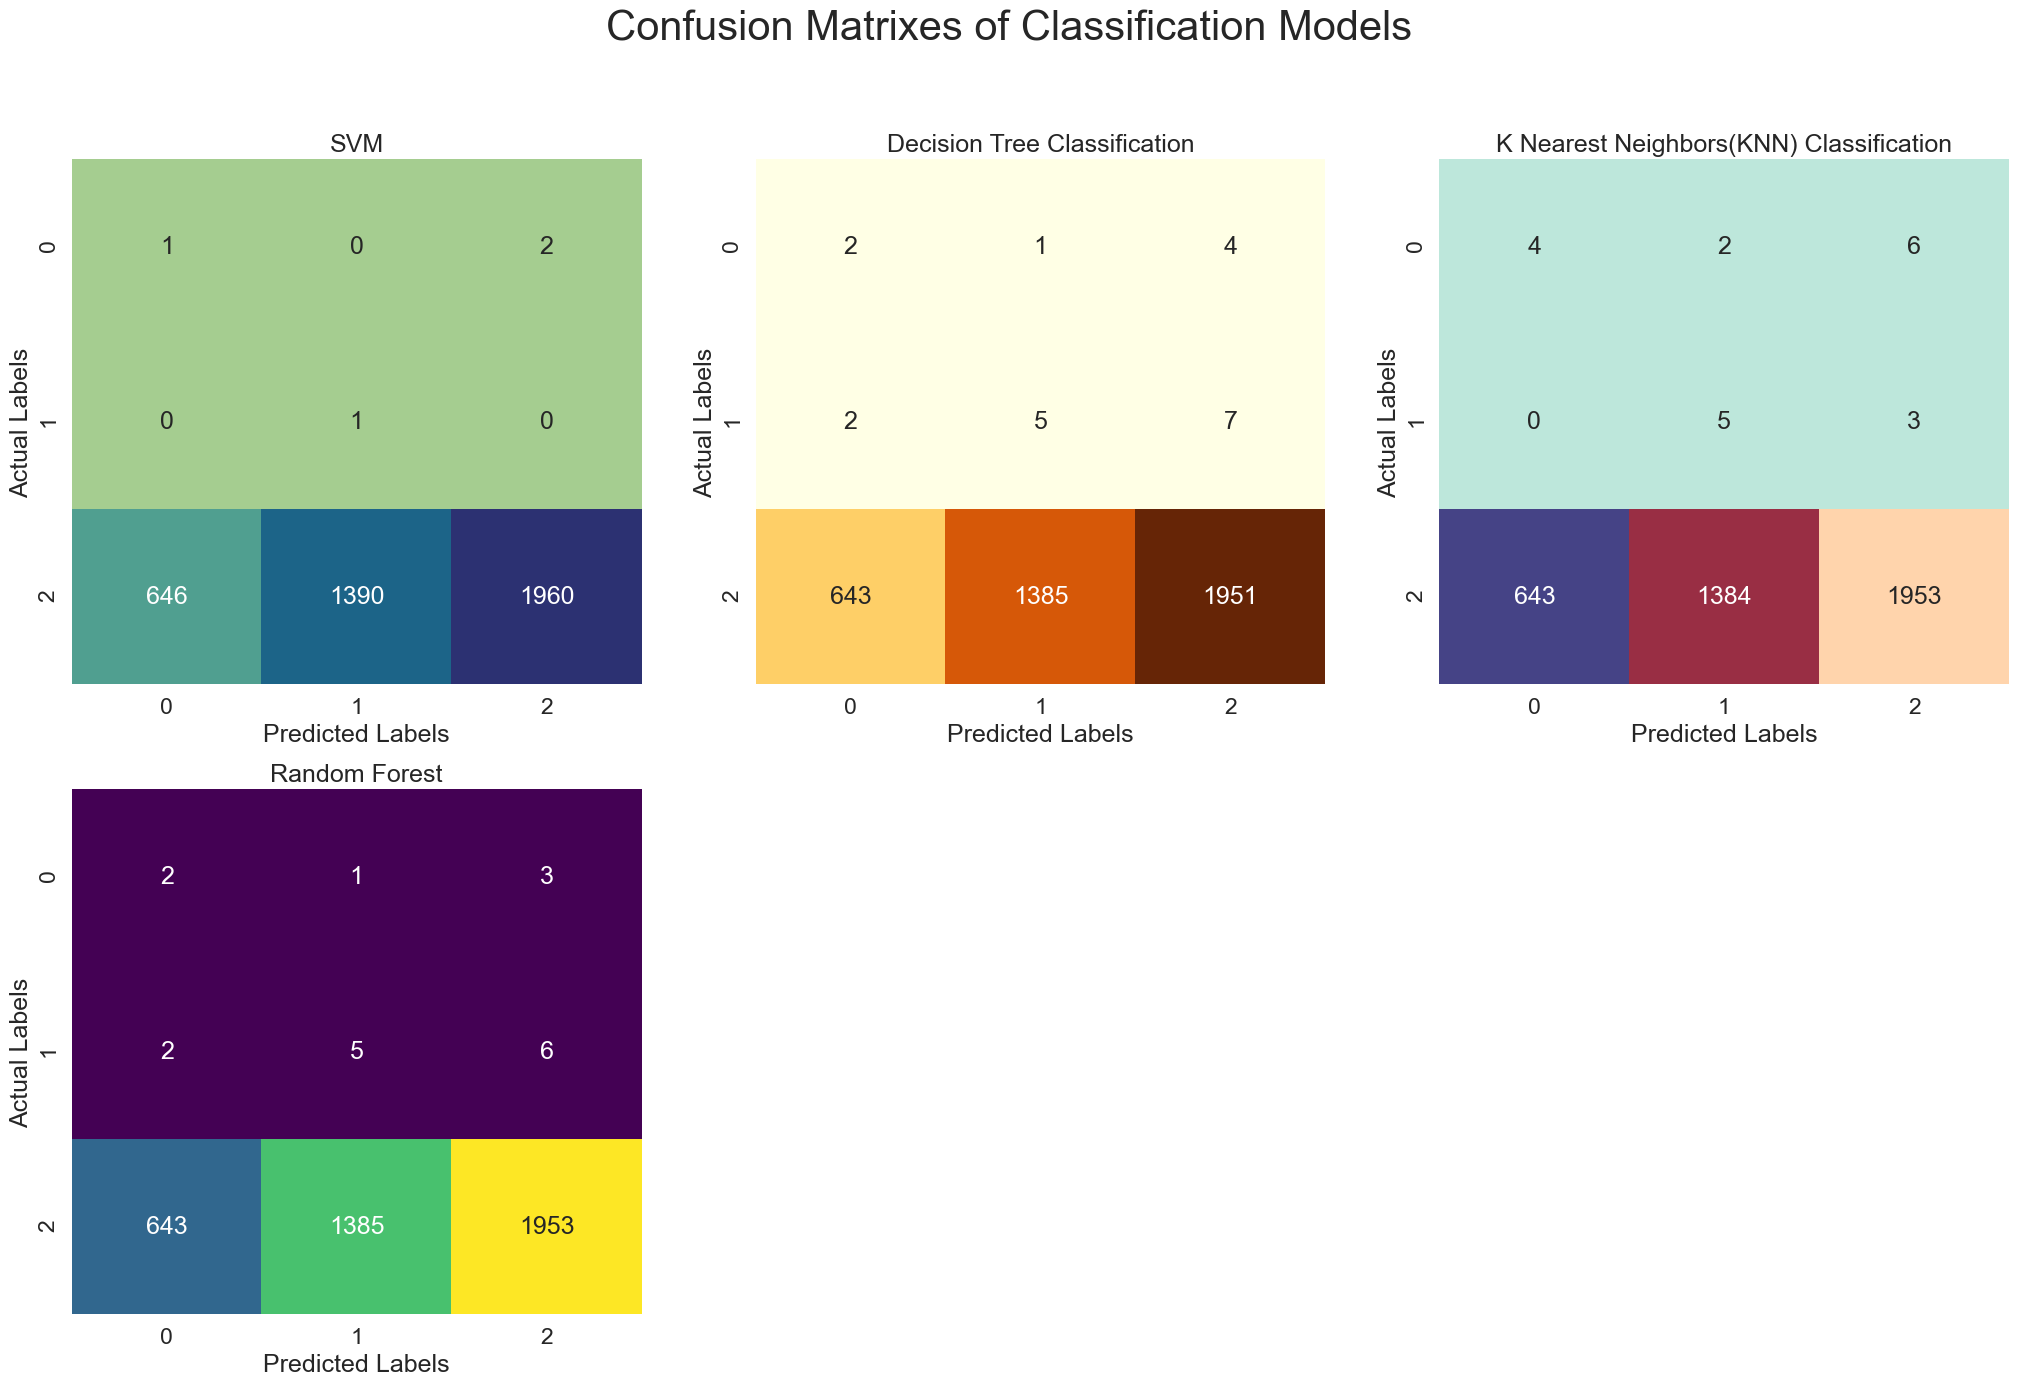

In [104]:
#sns.reset_defaults()
plt.figure(figsize=(25,15))
plt.suptitle("Confusion Matrixes of Classification Models",fontsize=30)
sns.set(font_scale=1.5)


plt.subplot(2,3,1)
plt.title("SVM")
sns.heatmap(cm_svc,annot=True,cmap='crest',fmt=".0f",cbar=False)
plt.subplot(2,3,1).set_xlabel('Predicted Labels')
plt.subplot(2,3,1).set_ylabel('Actual Labels')


plt.subplot(2,3,2)
plt.title("Decision Tree Classification")
sns.heatmap(cm_tree,annot=True,cmap='YlOrBr',fmt=".0f",cbar=False)
plt.subplot(2,3,2).set_xlabel('Predicted Labels')
plt.subplot(2,3,2).set_ylabel('Actual Labels')


plt.subplot(2,3,3)
plt.title("K Nearest Neighbors(KNN) Classification") 
sns.heatmap(cm_knn,annot=True,cmap='icefire',fmt=".0f",cbar=False)
plt.subplot(2,3,3).set_xlabel('Predicted Labels')
plt.subplot(2,3,3).set_ylabel('Actual Labels')


plt.subplot(2,3,4)
plt.title("Random Forest")
sns.heatmap(cm_rd,annot=True,cmap='viridis',fmt=".0f",cbar=False)
plt.subplot(2,3,4).set_xlabel('Predicted Labels')
plt.subplot(2,3,4).set_ylabel('Actual Labels')



plt.show()